# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [48]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('anaconda_projects/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = df.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself
sampled_data = pd.DataFrame()
sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF


#This *sampled_data* will contain 5% values selected at random from each hour.

#Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

#Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/prabhash/anaconda_projects/Datasets and Dictionary/trip_records')

file_list = os.listdir()

df = pd.DataFrame()

final_sampled_data = pd.DataFrame()

for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name)
        df = pd.read_parquet(file_path)
        sampled_data = pd.DataFrame()
        if 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            df['hour'] = df['timestamp'].dt.floor('H')  # Round to the hour

            for hour, hourly_df in df.groupby('hour'):
                sample = hourly_df.sample(frac=0.05, random_state=42)
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True)
        else:
            sampled_data = df.sample(frac=0.05, random_state=42)
            
        final_sampled_data = pd.concat([final_sampled_data, sampled_data], ignore_index=True)
        print(final_sampled_data)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-12-14 15:41:50   2023-12-14 16:52:03              2.0   
1              2  2023-12-27 22:23:14   2023-12-27 22:34:26              1.0   
2              1  2023-12-05 21:11:39   2023-12-05 21:34:54              1.0   
3              2  2023-12-30 20:23:25   2023-12-30 20:38:48              1.0   
4              1  2023-12-13 13:43:18   2023-12-13 13:49:02              1.0   
...          ...                  ...                   ...              ...   
166691         2  2023-12-17 22:41:03   2023-12-17 22:45:47              1.0   
166692         2  2023-12-07 20:46:00   2023-12-07 21:05:24              1.0   
166693         2  2023-12-08 01:35:07   2023-12-08 01:37:40              2.0   
166694         2  2023-12-11 12:24:37   2023-12-11 13:17:29              2.0   
166695         2  2023-12-13 22:27:07   2023-12-13 22:37:09              1.0   

        trip_distance  RatecodeID store

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [10]:
# Store the df in csv/parquet
#final_sampled_data.to_csv('final_sampled_data.csv', index=False)
# df.to_parquet('')
final_sampled_data.to_parquet('final_sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [12]:
# Load the new data file
df1 = pd.read_parquet('/Users/prabhash/anaconda_projects/Datasets and Dictionary/trip_records/final_sampled_data.parquet')
df1.info()
df1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995989 entries, 0 to 1995988
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-14 15:41:50   2023-12-14 16:52:03              2.0   
1         2  2023-12-27 22:23:14   2023-12-27 22:34:26              1.0   
2         1  2023-12-05 21:11:39   2023-12-05 21:34:54              1.0   
3         2  2023-12-30 20:23:25   2023-12-30 20:38:48              1.0   
4         1  2023-12-13 13:43:18   2023-12-13 13:49:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          20.88         3.0                  N           239             1   
1           0.90         1.0                  N           163           162   
2           3.80         1.0                  N           158           256   
3           1.34         1.0                  N            68            48   
4           0.50         1.0                  N           237           140   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        111.2    0.0      0.0         0.0          29.0   
1             1         11.4    1.0      0.5         4.1           0.0   
2             1         22.6    3.5      0.5         5.5           0.0   
3             2         14.2    1.0      0.5         0.0           0.0   
4             1          5.8    2.5      0.5         2.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         141.2                   0.0          0.0   
1                    1.0          20.5                   2.5          0.0   
2                    1.0          33.1                   2.5          0.0   
3                    1.0          19.2                   2.5          0.0   
4                    1.0          11.8                   2.5          0.0   

   airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [ ]:
# df.head()

In [ ]:
# df.info()

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed
df1.drop(columns=['store_and_fwd_flag'], inplace=True, errors='ignore')


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [18]:
# Combine the two airport fee columns
df1.drop(columns=['airport_fee'], inplace=True)


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995989 entries, 0 to 1995988
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_fee            float64       
dtypes: datetime64[us](2), 

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [22]:
(df1['fare_amount'] < 0).sum()



0

Did you notice something different in the `RatecodeID` column for above records?

In [24]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_df = df1[df1['fare_amount'] < 0]
ratecode_analysis = negative_fare_df['RatecodeID'].value_counts().sort_index()
print(ratecode_analysis)


Series([], Name: count, dtype: int64)


In [ ]:
# Find which columns have negative values
#Some have null values


In [ ]:
# fix these negative values
#none have negative values


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [26]:
# Find the proportion of missing values in each column
missing_proportion = df1.isnull().mean().sort_values(ascending=False)
print(missing_proportion)


Airport_fee              0.112483
congestion_surcharge     0.034207
passenger_count          0.034207
RatecodeID               0.034207
extra                    0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
mta_tax                  0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
fare_amount              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df1['passenger_count']=df1['passenger_count'].fillna(0)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [28]:
# Fix missing values in 'RatecodeID'
df1['RatecodeID']=df1['RatecodeID'].fillna(0)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [30]:
# handle null values in congestion_surcharge
df1['congestion_surcharge']=df1['congestion_surcharge'].fillna(0)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [32]:
# Handle any remaining missing values
df1['Airport_fee']=df1['Airport_fee'].fillna(0.0)


In [34]:
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-14 15:41:50   2023-12-14 16:52:03              2.0   
1         2  2023-12-27 22:23:14   2023-12-27 22:34:26              1.0   
2         1  2023-12-05 21:11:39   2023-12-05 21:34:54              1.0   
3         2  2023-12-30 20:23:25   2023-12-30 20:38:48              1.0   
4         1  2023-12-13 13:43:18   2023-12-13 13:49:02              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0          20.88         3.0           239             1             2   
1           0.90         1.0           163           162             1   
2           3.80         1.0           158           256             1   
3           1.34         1.0            68            48             2   
4           0.50         1.0           237           140             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        111.2    0.0      0.0         0.0          29.0   
1         11.4    1.0      0.5         4.1           0.0   
2         22.6    3.5      0.5         5.5           0.0   
3         14.2    1.0      0.5         0.0           0.0   
4          5.8    2.5      0.5         2.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         141.2                   0.0          0.0  
1                    1.0          20.5                   2.5          0.0  
2                    1.0          33.1                   2.5          0.0  
3                    1.0          19.2                   2.5          0.0  
4                    1.0          11.8                   2.5          0.0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [36]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

for col in df1.select_dtypes(include='number').columns:
    min_val, max_val = df1[col].min(), df1[col].max()
    if min_val < 0 or max_val > df1[col].quantile(0.99) * 2:  
        print(f"{col}: min={min_val}, max={max_val}")

for col in df1.select_dtypes(include='number').columns:
    min_val, max_val = df1[col].min(), df1[col].max()
    if min_val < 0 or max_val > df1[col].quantile(0.99) * 2: 
        print(f"{col}: min={min_val}, max={max_val}")

#unique values
for col in df1.select_dtypes(include='object').columns:
    print(f"\n{col} unique values:")
    print(df1[col].value_counts(dropna=False))

# View rows with very high fare_amount, total_amount
df1[df1['fare_amount'] > 500]  # adjust threshold as needed
df1[df1['total_amount'] < 1500]    

VendorID: min=1, max=6
trip_distance: min=0.0, max=186514.09
RatecodeID: min=0.0, max=99.0
fare_amount: min=0.0, max=2194.7
extra: min=-5.0, max=14.25
mta_tax: min=-0.5, max=4.0
tip_amount: min=0.0, max=300.0
tolls_amount: min=-6.94, max=132.04
improvement_surcharge: min=-1.0, max=1.0
total_amount: min=-17.69, max=2203.14
congestion_surcharge: min=-2.5, max=2.5
Airport_fee: min=-1.75, max=1.75
VendorID: min=1, max=6
trip_distance: min=0.0, max=186514.09
RatecodeID: min=0.0, max=99.0
fare_amount: min=0.0, max=2194.7
extra: min=-5.0, max=14.25
mta_tax: min=-0.5, max=4.0
tip_amount: min=0.0, max=300.0
tolls_amount: min=-6.94, max=132.04
improvement_surcharge: min=-1.0, max=1.0
total_amount: min=-17.69, max=2203.14
congestion_surcharge: min=-2.5, max=2.5
Airport_fee: min=-1.75, max=1.75


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-14 15:41:50   2023-12-14 16:52:03              2.0   
1               2  2023-12-27 22:23:14   2023-12-27 22:34:26              1.0   
2               1  2023-12-05 21:11:39   2023-12-05 21:34:54              1.0   
3               2  2023-12-30 20:23:25   2023-12-30 20:38:48              1.0   
4               1  2023-12-13 13:43:18   2023-12-13 13:49:02              1.0   
...           ...                  ...                   ...              ...   
1995984         2  2023-09-29 07:53:54   2023-09-29 08:00:41              1.0   
1995985         2  2023-03-21 19:11:18   2023-03-21 19:20:51              1.0   
1995986         2  2023-07-05 21:09:01   2023-07-05 21:34:10              1.0   
1995987         1  2023-12-13 21:35:14   2023-12-13 21:45:00              1.0   
1995988         1  2023-08-11 14:15:50   2023-08-11 14:36:04              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                20.88         3.0           239             1             2   
1                 0.90         1.0           163           162             1   
2                 3.80         1.0           158           256             1   
3                 1.34         1.0            68            48             2   
4                 0.50         1.0           237           140             1   
...                ...         ...           ...           ...           ...   
1995984           1.12         1.0           231           158             1   
1995985           1.81         1.0           163           236             1   
1995986           4.95         1.0           163           231             1   
1995987           1.20         1.0           231            87             1   
1995988           2.90         1.0            50            24             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              111.2    0.0      0.0        0.00          29.0   
1               11.4    1.0      0.5        4.10           0.0   
2               22.6    3.5      0.5        5.50           0.0   
3               14.2    1.0      0.5        0.00           0.0   
4                5.8    2.5      0.5        2.00           0.0   
...              ...    ...      ...         ...           ...   
1995984          8.6    0.0      0.5        1.50           0.0   
1995985         11.4    2.5      0.5        2.00           0.0   
1995986         26.1    1.0      0.5        2.00           0.0   
1995987          9.3    3.5      0.5        2.85           0.0   
1995988         17.7    2.5      0.5        1.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0        141.20                   0.0   
1                          1.0         20.50                   2.5   
2                          1.0         33.10                   2.5   
3                          1.0         19.20                   2.5   
4                          1.0         11.80                   2.5   
...                        ...           ...                   ...   
1995984                    1.0         14.10                   2.5   
1995985                    1.0         19.90                   2.5   
1995986                    1.0         33.10                   2.5   
1995987                    1.0         17.15                   2.5   
1995988                    1.0         22.70                   2.5   

         Airport_fee  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
1995984          0.0  
1995985          0.0  
1995986          0.0  
1995987          0.0  
1995988          0.0  

[1995987 rows x 18 columns]

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [38]:
# remove passenger_count > 6
df1 = df1[df1['passenger_count'] <= 6]

In [40]:
# Continue with outlier handling
df1 = df1[~((df1['trip_distance'] < 0.1) & (df1['fare_amount'] > 300))]
df1 = df1[df1['trip_distance'] <= 250]
df1 = df1[df1['payment_type'] != 0]


In [42]:
# Do any columns need standardising?

#Trip_distance = 0 and fare_amount = 0, but different pickup/dropoff zones
#If zones differ, distance/fare shouldn't be 0 — invalid ride → drop:

condition = (
    (df1['trip_distance'] == 0) & 
    (df1['fare_amount'] == 0) &
    (df1['PULocationID'] != df1['DOLocationID'])
)

df1 = df1[~condition]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [44]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis
My response is ---- These are numerical and to be used for features for aggregation, prediction, and outlier detection.

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

pickup_hour
0      53850
1      36033
2      23795
3      15646
4       9873
5      10774
6      26120
7      51144
8      71427
9      82842
10     89898
11     98175
12    106438
13    109615
14    116820
15    120582
16    120361
17    130356
18    135895
19    122202
20    108942
21    108366
22    100134
23     78299
Name: count, dtype: int64


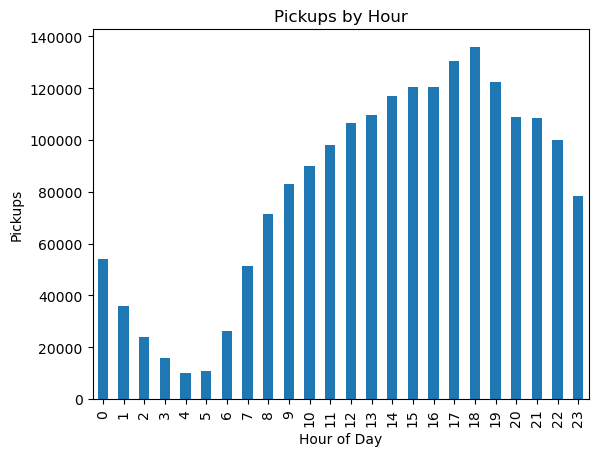

In [50]:
# Find and show the hourly trends in taxi pickups
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
hourly_counts = df1['pickup_hour'].value_counts().sort_index()
print(hourly_counts)

hourly_counts.plot(kind='bar', title='Pickups by Hour', xlabel='Hour of Day', ylabel='Pickups')
plt.show()

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df1['pickup_dayofweek'] = df1['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday
dow_counts = df1['pickup_dayofweek'].value_counts().sort_index()
print(dow_counts)

dow_counts.plot(kind='bar', title='Pickups by Day of Week', xlabel='Day', ylabel='Pickups')
plt.show()

In [ ]:
# Show the monthly trends in pickups
df1['pickup_month'] = df1['tpep_pickup_datetime'].dt.month
monthly_counts = df1['pickup_month'].value_counts().sort_index()
print(monthly_counts)

monthly_counts.plot(kind='bar', title='Pickups by Month', xlabel='Month', ylabel='Pickups')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
for col in cols:
    zero_count = (df1[col] == 0).sum()
    neg_count = (df1[col] < 0).sum()
    print(f"{col}: {zero_count} zero values, {neg_count} negative values")

#Output is as below - yes it has zero and negative values
#fare_amount: 616 zero values, 0 negative values
#tip_amount: 434132 zero values, 0 negative values
#total_amount: 258 zero values, 106 negative values
#trip_distance: 36862 zero values, 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?
Yes it is beneficical to create a copy dataframe excluding the zero values as it helps ti improve data quality and helps in achieving more accurate results.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [52]:
# Create a df with non zero entries for the selected parameters.
filtered_df = df1[
    (df1['fare_amount'] > 0) &
    (df1['trip_distance'] > 0) &
    (df1['tip_amount'] >= 0)
].copy()
# Earlier row count was 1895811
# After removing the zeroes the count is reduced to 1859231

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

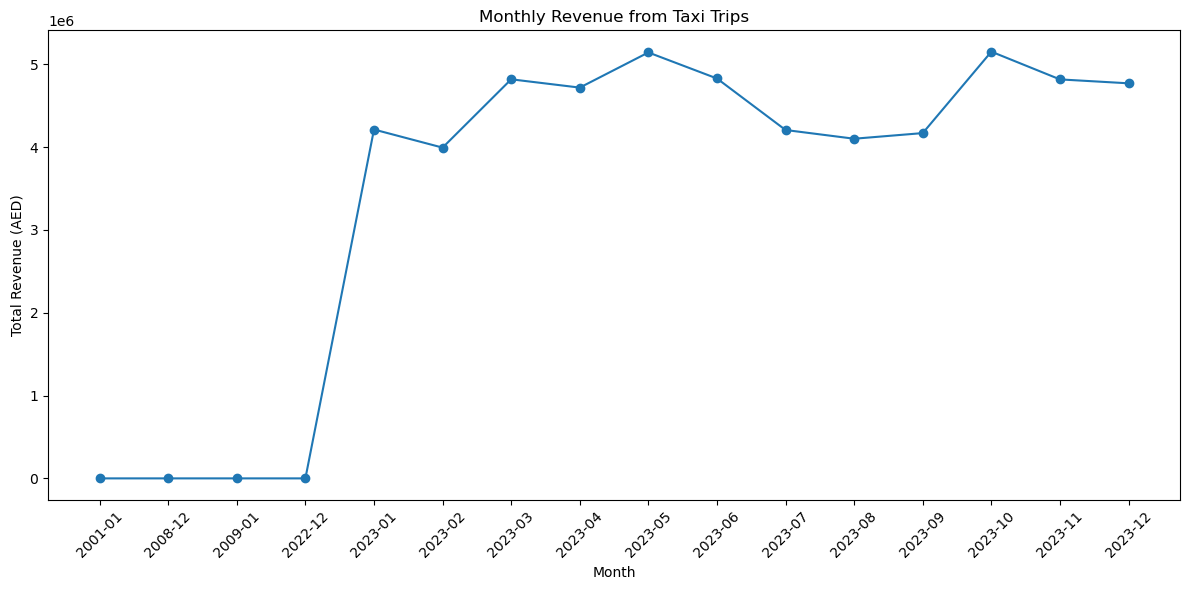

In [54]:
# Group data by month and analyse monthly revenue

filtered_df['month'] = filtered_df['tpep_pickup_datetime'].dt.to_period('M')
monthly_revenue = filtered_df.groupby('month')[['fare_amount', 'tip_amount', 'total_amount']].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue['month'].astype(str), monthly_revenue['total_amount'], marker='o')
plt.title('Monthly Revenue from Taxi Trips')
plt.xlabel('Month')
plt.ylabel('Total Revenue (AED)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Output of above command was - Monthly Revenue graph with circular plots was shown for taxi trips

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

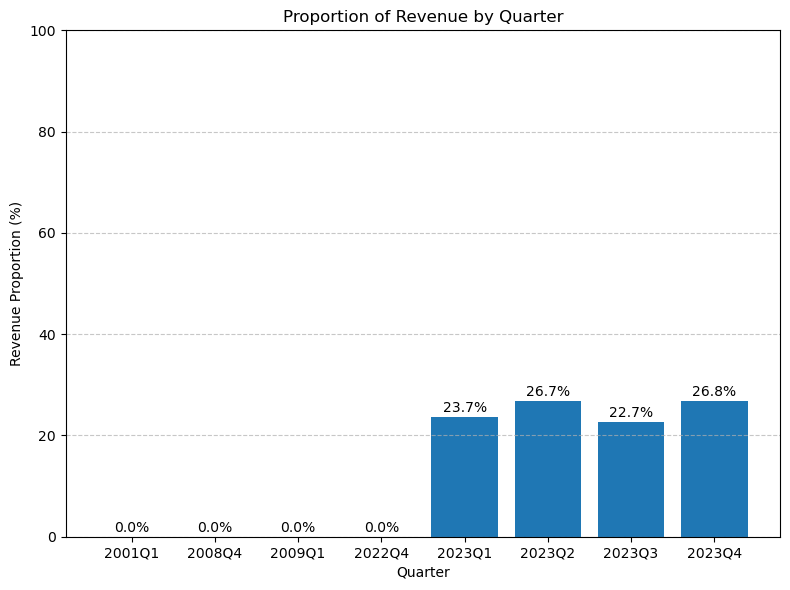

In [63]:
# Calculate proportion of each quarter
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'])
filtered_df['quarter'] = filtered_df['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = filtered_df.groupby('quarter')['total_amount'].sum().reset_index()
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue
quarterly_revenue['proportion'] = (quarterly_revenue['proportion'] * 100).round(2).astype(str) + '%'

quarterly_revenue['proportion'] = quarterly_revenue['proportion'].str.rstrip('%').astype(float)
quarterly_revenue['label_text'] = quarterly_revenue['proportion'].round(1).astype(str) + '%'

plt.figure(figsize=(8, 6))
plt.bar(quarterly_revenue['quarter'].astype(str), quarterly_revenue['proportion'])

plt.title('Proportion of Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Revenue Proportion (%)')
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(quarterly_revenue)):
    pct = quarterly_revenue.loc[i, 'proportion']     
    label = quarterly_revenue.loc[i, 'label_text']        
    plt.text(i, pct + 1, label, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

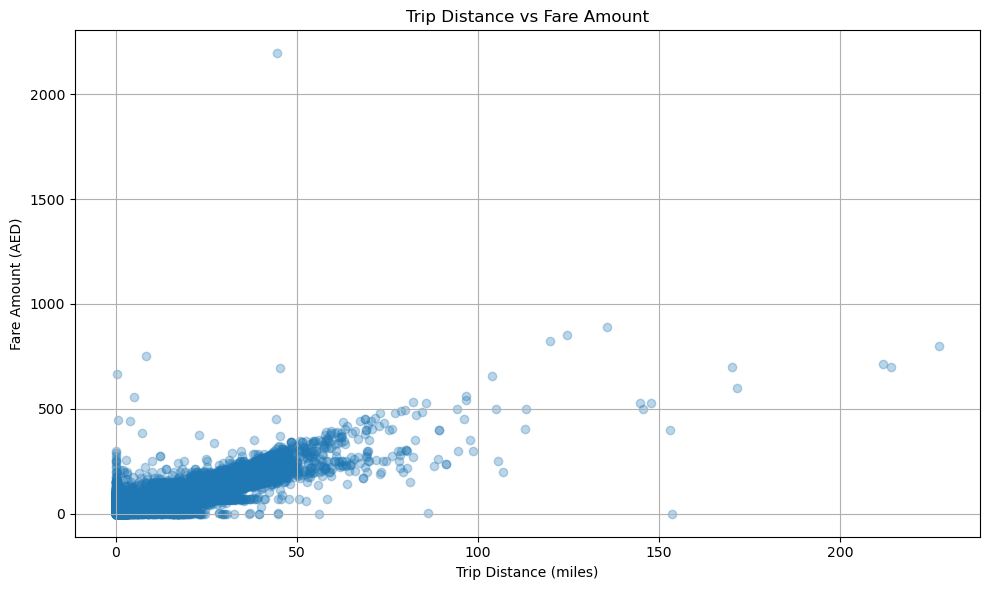

Correlation between trip_distance and fare_amount: 0.942


In [71]:
# Show how trip fare is affected by distance
df_filtered = df1[df1['trip_distance'] > 0].copy()
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['trip_distance'], df_filtered['fare_amount'], alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (AED)')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.3f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare_amount and trip_duration: 0.816


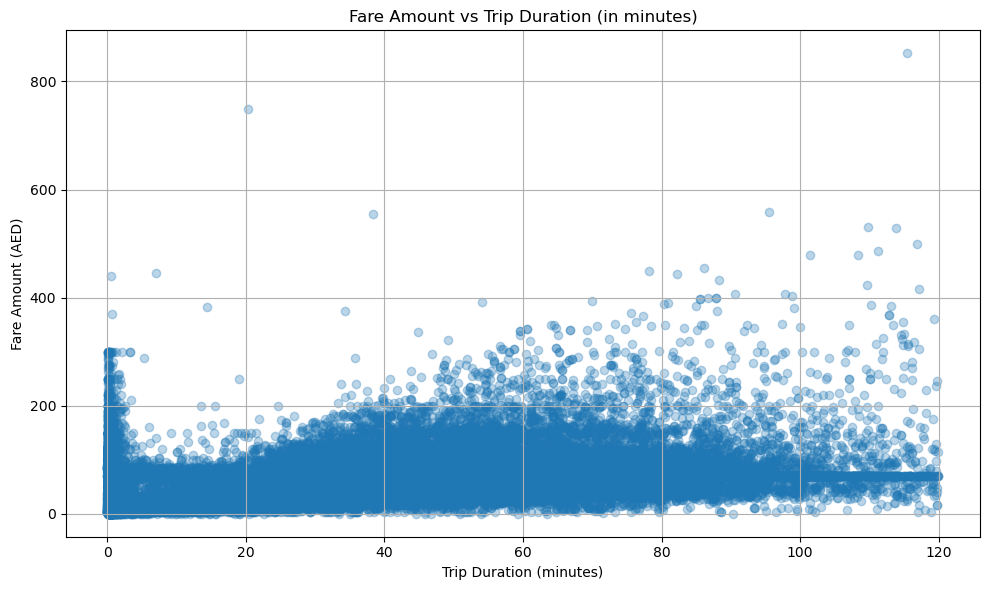

In [69]:
# Show relationship between fare and trip duration
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])
df1['trip_duration_min'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60

df_filtered1 = df1[
    (df1['fare_amount'] > 0) &
    (df1['trip_duration_min'] > 0) &
    (df1['trip_duration_min'] < 120)  # cap at 2 hours to remove outliers
].copy()

correlation = df_filtered1['fare_amount'].corr(df_filtered1['trip_duration_min'])
print(f"Correlation between fare_amount and trip_duration: {correlation:.3f}")

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered1['trip_duration_min'], df_filtered1['fare_amount'], alpha=0.3)
plt.title('Fare Amount vs Trip Duration (in minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (AED)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Output is Correlation between fare_amount and trip_duration: 0.810 which means as trip duration increases, the fare amount also tends to increase.


Correlation between fare_amount and passenger_count: 0.046


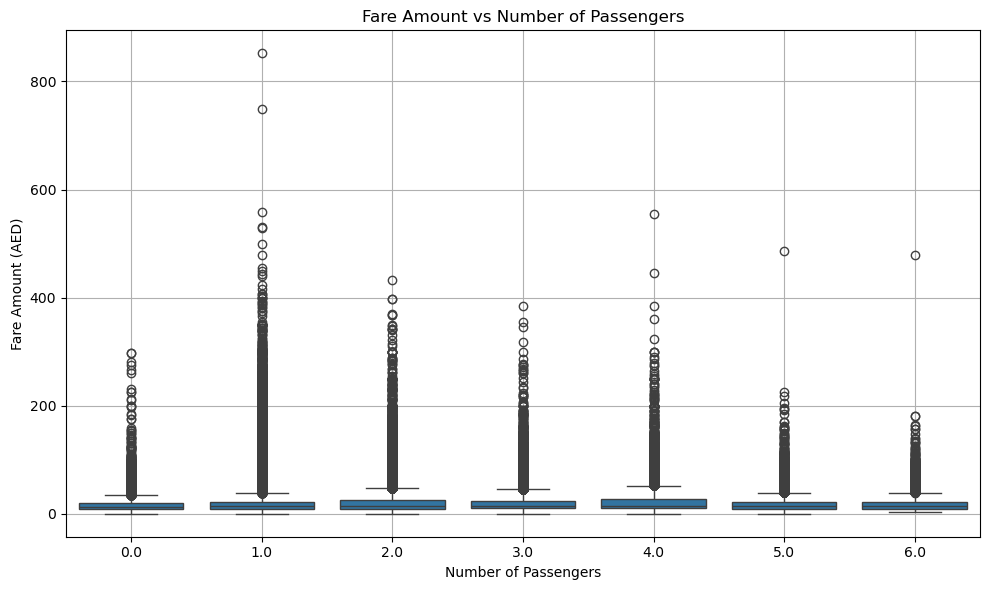

In [73]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_filtered1)
plt.title('Fare Amount vs Number of Passengers')
correlation = df_filtered1['fare_amount'].corr(df_filtered1['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation:.3f}")
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount (AED)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Output is Correlation between fare_amount and passenger_count: 0.046 which means that the number of passengers have no effect on the fare amount



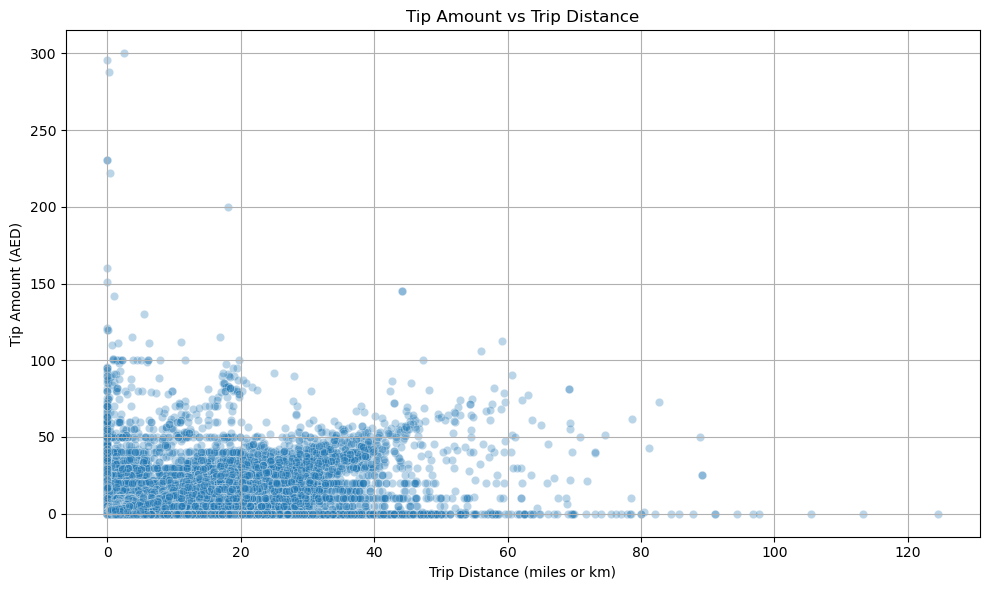

Correlation between tip_amount and trip_duration: 0.580


In [77]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_filtered1, alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles or km)')
plt.ylabel('Tip Amount (AED)')
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = df_filtered1['trip_distance'].corr(df_filtered1['tip_amount'])
print(f"Correlation between tip_amount and trip_duration: {correlation:.3f}")

#Output is Correlation between tip_amount and trip_distance: 0.580 which means moderate positive relationship between the two variables.
#Longer trips results into more tipping
#Tip amount is subjective and depends on customer satisfaction, driver behaviour, payment method and total fare and rounding.



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_method
Credit Card    1572231
Cash            331499
Dispute          14412
No Charge         9445
Name: count, dtype: int64
payment_method
Credit Card    81.56
Cash           17.20
Dispute         0.75
No Charge       0.49
Name: count, dtype: float64


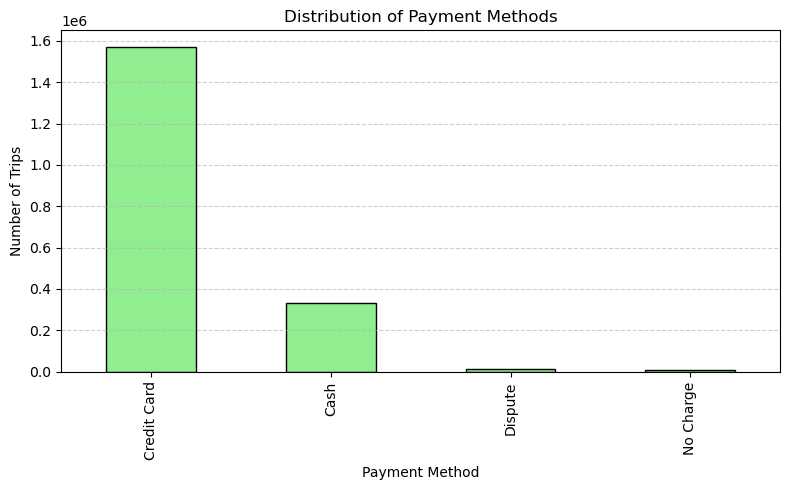

In [79]:
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}
df1['payment_method'] = df1['payment_type'].map(payment_mapping)
payment_counts = df1['payment_method'].value_counts()
print(payment_counts)

payment_percentages = (payment_counts / payment_counts.sum()) * 100
print(payment_percentages.round(2))

#Output is as below PErcent %:

#Name: count, dtype: int64
#payment_method
#Credit Card    81.56
#Cash           17.20
#Dispute         0.75
#No Charge       0.49
#Name: count, dtype: float64

#We can also plot a bar graph where it shows that the credit card is used more often as a mode of payments for taxi trips

plt.figure(figsize=(8, 5))
payment_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [83]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("/Users/prabhash/anaconda_projects/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
# print(zones.info())
# zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [145]:
# Merge zones and trip records using locationID and PULocationID
# Step 1: Rename 'LocationID' in zone_gdf to match trip data
zone_gdf_renamed = zones[['LocationID', 'zone']].rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})

# Step 2: Merge with trip data on PULocationID
df_with_zones = df1.merge(zone_gdf_renamed, on='PULocationID', how='left')

# Step 3: Preview merged data
df_with_zones[['PULocationID', 'pickup_zone']].head()

dropoff_zones = zones[['LocationID', 'zone']].rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})
df_with_zones = df_with_zones.merge(dropoff_zones, on='DOLocationID', how='left')


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [93]:
# Group data by location and calculate the number of trips

pickup_counts = df_with_zones.groupby('pickup_zone').size().reset_index(name='trip_count')
pickup_counts = pickup_counts.sort_values(by='trip_count', ascending=False)
pickup_counts.head()

pickup_zone  trip_count
119            JFK Airport      102236
226  Upper East Side South       91518
151         Midtown Center       90340
225  Upper East Side North       81330
152           Midtown East       69281

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [95]:
# Merge trip counts back to the zones GeoDataFrame
# Step 1: Merge trip count with the zone GeoDataFrame on 'zone'
zone_gdf_with_trips = zones.merge(pickup_counts, how='left', left_on='zone', right_on='pickup_zone')
zone_gdf_with_trips['trip_count'] = zone_gdf_with_trips['trip_count'].fillna(0)
zone_gdf_with_trips[['zone', 'trip_count']].head()

zone  trip_count
0           Newark Airport       244.0
1              Jamaica Bay         6.0
2  Allerton/Pelham Gardens        42.0
3            Alphabet City      1986.0
4            Arden Heights        20.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

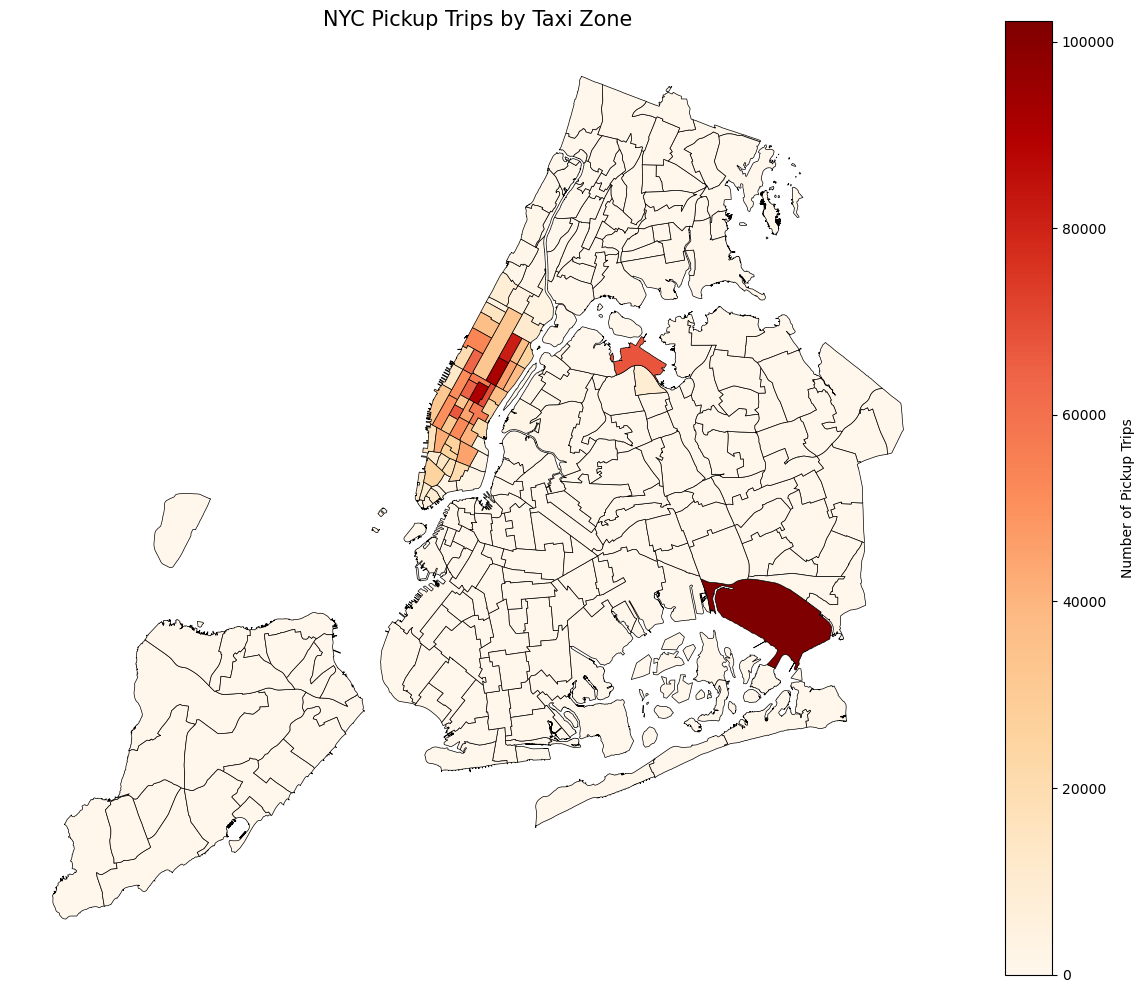

In [97]:
# Define figure and axis


# Plot the map and display it


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zone_gdf_with_trips.plot(
    column='trip_count',            
    ax=ax,                          
    legend=True,                    
    cmap='OrRd',                    
    edgecolor='black',              
    linewidth=0.5,                
    legend_kwds={
        'label': "Number of Pickup Trips",
        'orientation': "vertical"
    }
)

ax.set_title("NYC Pickup Trips by Taxi Zone", fontsize=15)
ax.axis('off')  
plt.tight_layout()
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zone_gdf_with_trips.sort_values(by='trip_count', ascending=False)
# Displaying top 10 zones with highest number of trips
sorted_zones[['zone', 'trip_count']].head(10)


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [147]:
# Find routes which have the slowest speeds at different times of the day

# Convert duration to hours

df_with_zones['trip_duration_hour'] = (df_with_zones['tpep_dropoff_datetime'] - df_with_zones['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_with_zones['trip_duration_min'] = df_with_zones['trip_duration_hour'] * 60

# Calculate speed 
df_with_zones['trip_speed'] = df_with_zones['trip_distance'] / df_with_zones['trip_duration_hour']

# Optional: Filter out unrealistic speeds (e.g., > 100 km/h)
df_valid = df_with_zones[
    (df_with_zones['trip_speed'] > 0) &
    (df_with_zones['trip_speed'] < 100)
]
df_valid.head()

df_valid = df_with_zones[
    (df_with_zones['trip_duration_hour'] > 0.05) &   
    (df_with_zones['trip_duration_hour'] < 3) &      
    (df_with_zones['trip_speed'] > 0) &
    (df_with_zones['trip_speed'] < 100)           
]

slowest_routes_by_hour = df_valid.groupby(
    ['pickup_zone', 'dropoff_zone', 'trip_duration_hour']
).agg(
    avg_speed=('trip_speed', 'mean'),
    avg_duration_min=('trip_duration_hour', lambda x: (x.mean()) * 60),
    trip_count=('trip_speed', 'count')
).reset_index()

slowest_routes_filtered = slowest_routes_by_hour[slowest_routes_by_hour['trip_count'] > 20]
# Sort by average speed to get slowest
slowest_routes_sorted = slowest_routes_filtered.sort_values(by='avg_speed', ascending=True)
# Display top 10 slowest routes
slowest_routes_sorted.head(10)



pickup_zone           dropoff_zone  trip_duration_hour  \
950902  Upper East Side South  Upper East Side South            0.102500   
950912  Upper East Side South  Upper East Side South            0.105278   
950852  Upper East Side South  Upper East Side South            0.088611   
950925  Upper East Side South  Upper East Side South            0.108889   
950893  Upper East Side South  Upper East Side South            0.100000   
950943  Upper East Side South  Upper East Side South            0.113889   
918811  Upper East Side North  Upper East Side North            0.095000   
950880  Upper East Side South  Upper East Side South            0.096389   
950903  Upper East Side South  Upper East Side South            0.102778   
950867  Upper East Side South  Upper East Side South            0.092778   

        avg_speed  avg_duration_min  trip_count  
950902   5.915086          6.150000          27  
950912   5.918091          6.316667          23  
950852   6.372145          5.316667          28  
950925   6.397959          6.533333          21  
950893   6.433333          6.000000          27  
950943   6.434843          6.833333          21  
918811   6.441103          5.700000          21  
950880   6.447098          5.783333          21  
950903   6.532187          6.166667          22  
950867   6.556105          5.566667          23

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [164]:
# Visualise the number of trips per hour and find the busiest hour
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])

# Calculate trip duration in hours
df_filtered['trip_duration_hour'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 3600

hourly_trip_counts = df_filtered['trip_duration_hour'].value_counts().sort_index()
print(hourly_trip_counts)
busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_count = hourly_trip_counts.max()

print(f"Busiest hour: {busiest_hour}:00 with {busiest_hour_count} trips.")

trip_duration_hour
-0.885000      1
-0.879167      1
-0.852500      1
-0.851667      1
-0.846667      1
              ..
 42.930556     1
 46.388889     1
 49.129722     1
 50.189722     1
 117.560278    1
Name: count, Length: 8439, dtype: int64
Busiest hour: 0.12333333333333334:00 with 1876 trips.


/var/folders/lq/rccd36fd1ml6xsc2q66pjb440000gn/T/ipykernel_1573/2025628484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
/var/folders/lq/rccd36fd1ml6xsc2q66pjb440000gn/T/ipykernel_1573/2025628484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])
/var/folders/lq/rccd36fd1ml6xsc2q66pjb440000gn/T/ipykernel_1573/2025628484.p

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

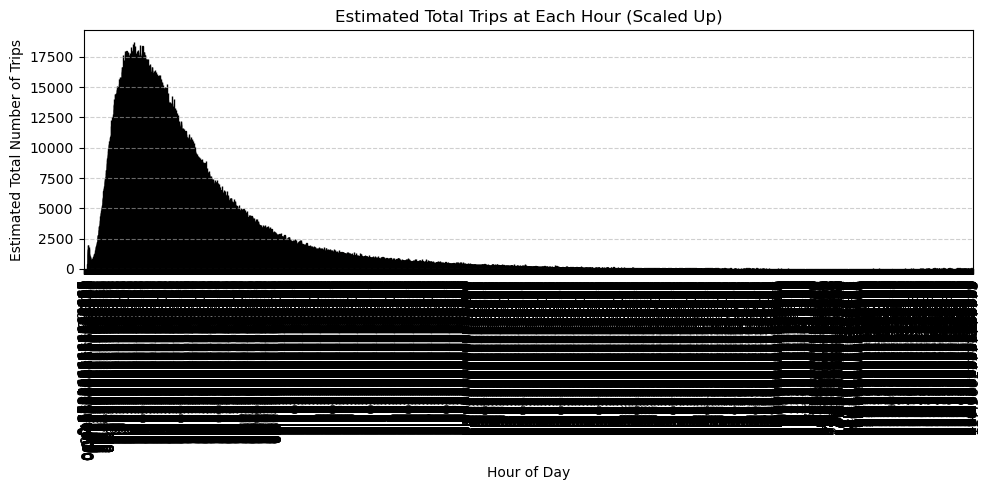

Estimated busiest hour: 0.12333333333333334:00 with approx. 18,760 trips.


In [167]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.10  # or 1 / 10
hourly_trip_counts = df_filtered['trip_duration_hour'].value_counts().sort_index()
scaled_hourly_trip_counts = hourly_trip_counts / sample_fraction

plt.figure(figsize=(10, 5))
scaled_hourly_trip_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Estimated Total Trips at Each Hour (Scaled Up)')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Total Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Show the busiest hour
busiest_hour = scaled_hourly_trip_counts.idxmax()
trip_count = int(scaled_hourly_trip_counts.max())

print(f"Estimated busiest hour: {busiest_hour}:00 with approx. {trip_count:,} trips.")

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
df_filtered['day_of_week'] = df_filtered['tpep_pickup_datetime'].dt.dayofweek
df_filtered['day_type'] = df_filtered['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
traffic_trends = df_filtered.groupby(['day_type', 'pickup_hour']).size().reset_index(name='trip_count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_trends, x='pickup_hour', y='trip_count', hue='day_type', marker='o')
plt.title('Traffic Trends: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

Top 10 Pickup Zones:
pickup_zone
JFK Airport                     102415
Upper East Side South            91525
Midtown Center                   90348
Upper East Side North            81333
Midtown East                     69284
LaGuardia Airport                67650
Penn Station/Madison Sq West     67335
Times Sq/Theatre District        65059
Lincoln Square East              63776
Murray Hill                      57222
Name: count, dtype: int64

Top 10 Dropoff Zones:
dropoff_zone
Upper East Side North        85389
Upper East Side South        82053
Midtown Center               74816
Times Sq/Theatre District    60143
Murray Hill                  57179
Midtown East                 54581
Lincoln Square East          54105
Upper West Side South        53893
Lenox Hill West              51198
East Chelsea                 48614
Name: count, dtype: int64


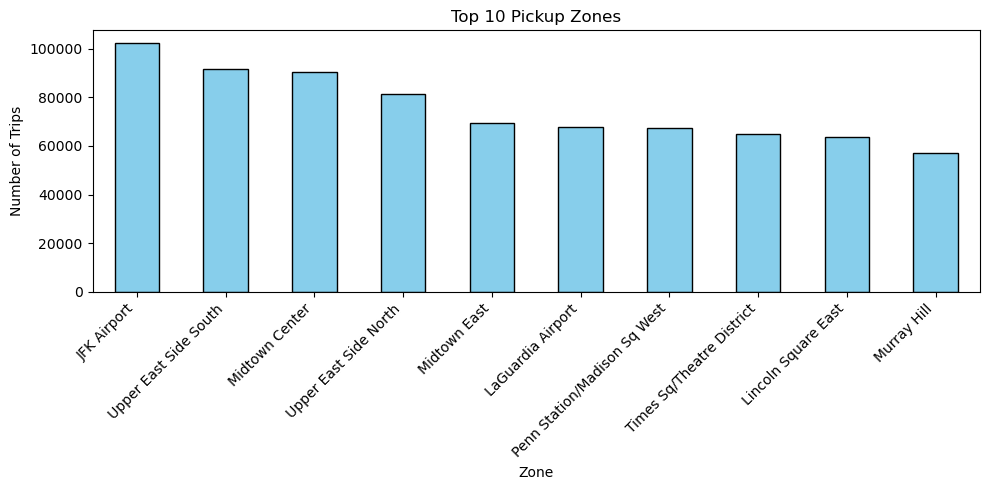

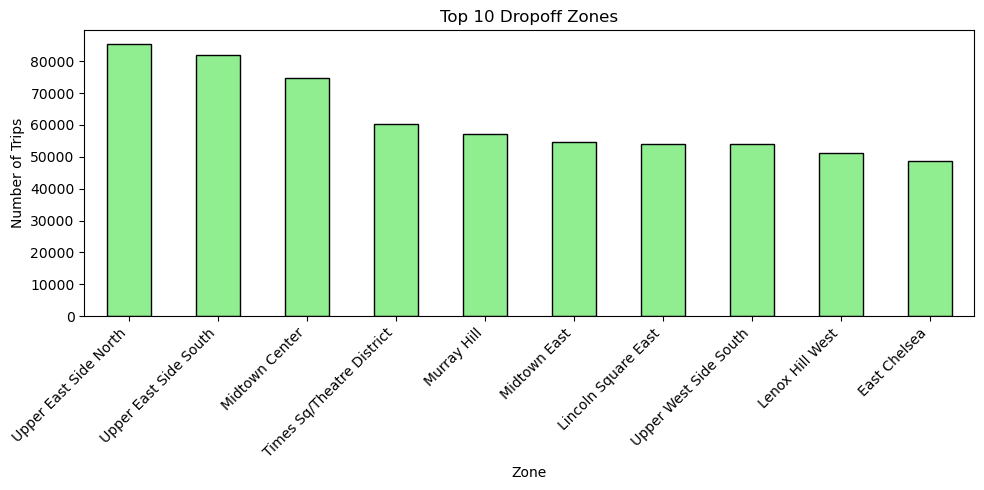

In [155]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
top_pickup_zones = df_with_zones['pickup_zone'].value_counts().head(10)
print("Top 10 Pickup Zones:")
print(top_pickup_zones)
top_dropoff_zones = df_with_zones['dropoff_zone'].value_counts().head(10)
print("\nTop 10 Dropoff Zones:")
print(top_dropoff_zones)

# Pickup zones
plt.figure(figsize=(10, 5))
top_pickup_zones.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Pickup Zones')
plt.xlabel('Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Dropoff zones
plt.figure(figsize=(10, 5))
top_dropoff_zones.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Dropoff Zones')
plt.xlabel('Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [133]:
print(df_with_zones.columns.tolist())

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'trip_duration_min', 'payment_method', 'pickup_zone', 'trip_duration_hour', 'trip_speed']


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [157]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

#Filter trips that occurred between 11 PM and 5 AM

df_with_zones['tpep_pickup_datetime'] = pd.to_datetime(df_with_zones['tpep_pickup_datetime'])
df_with_zones['pickup_hour'] = df_with_zones['tpep_pickup_datetime'].dt.hour

night_df = df_with_zones[(df_with_zones['pickup_hour'] >= 23) | (df_with_zones['pickup_hour'] <= 5)]

top_night_pickups = night_df['pickup_zone'].value_counts().head(10)
print("Top 10 Pickup Zones (11 PM to 5 AM):")
print(top_night_pickups)
top_night_dropoffs = night_df['dropoff_zone'].value_counts().head(10)
print("\nTop 10 Dropoff Zones (11 PM to 5 AM):")
print(top_night_dropoffs)

Top 10 Pickup Zones (11 PM to 5 AM):
pickup_zone
East Village                    16547
JFK Airport                     15538
West Village                    12966
Clinton East                    10823
Lower East Side                 10462
Greenwich Village South          9243
Times Sq/Theatre District        8685
Penn Station/Madison Sq West     7455
Midtown South                    6517
LaGuardia Airport                6442
Name: count, dtype: int64

Top 10 Dropoff Zones (11 PM to 5 AM):
dropoff_zone
East Village                 8884
Clinton East                 7282
Murray Hill                  6554
Gramercy                     6064
East Chelsea                 6043
Lenox Hill West              5639
Yorkville West               5433
West Village                 5147
Times Sq/Theatre District    5045
Flatiron                     4598
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
df_with_zones['total_amount'] = df_with_zones['fare_amount'] + df_with_zones['tip_amount']  

def classify_time(hour):
    return 'Night' if (hour >= 23 or hour <= 5) else 'Day'

df_with_zones['time_period'] = df_with_zones['pickup_hour'].apply(classify_time)

revenue_by_period = df.groupby('time_period')['revenue'].sum()
total_revenue = revenue_by_period.sum()
revenue_share = (revenue_by_period / total_revenue * 100).round(2)
print("Revenue Share:")
print(revenue_share)

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [121]:
# Analyse the fare per mile per passenger for different passenger counts

df_filtered = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
df_filtered['fare_per_mile_per_passenger'] = (
    df_filtered['fare_amount'] / (df_filtered['trip_distance'] * df_filtered['passenger_count'])
)
fare_analysis = df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().round(2)

print("Average Fare per Mile per Passenger by Passenger Count:")
print(fare_analysis)


Average Fare per Mile per Passenger by Passenger Count:
passenger_count
1.0    10.70
2.0     6.67
3.0     3.63
4.0     4.20
5.0     1.73
6.0     1.56
7.0    95.60
8.0    79.43
Name: fare_per_mile_per_passenger, dtype: float64


/var/folders/lq/rccd36fd1ml6xsc2q66pjb440000gn/T/ipykernel_1573/2185821761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fare_per_mile_per_passenger'] = (


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [119]:
# Compare the average fare per mile for different days and for different times of the day

df_filtered = df[df['trip_distance'] > 0].copy()
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

df_filtered['pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
df_filtered['day_of_week'] = df_filtered['pickup_datetime'].dt.day_name()
df_filtered['hour'] = df_filtered['pickup_datetime'].dt.hour

# Step 4: Create time-of-day buckets
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_filtered['time_of_day'] = df_filtered['hour'].apply(time_of_day)

avg_fare_per_mile_day = df_filtered.groupby('day_of_week')['fare_per_mile'].mean().round(2).sort_index()

avg_fare_per_mile_time = df_filtered.groupby('time_of_day')['fare_per_mile'].mean().round(2)

# Display results
print("Average Fare per Mile by Day of the Week:")
print(avg_fare_per_mile_day)

print("\nAverage Fare per Mile by Time of Day:")
print(avg_fare_per_mile_time)

Average Fare per Mile by Day of the Week:
day_of_week
Friday       10.86
Monday       10.70
Saturday     11.38
Sunday       11.68
Thursday     10.77
Tuesday      11.71
Wednesday    10.93
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Time of Day:
time_of_day
Afternoon    12.14
Evening      11.02
Morning      10.46
Night        10.63
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [117]:
# Compare fare per mile for different vendors
df_filtered = df[df['trip_distance'] > 0].copy()

df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

fare_per_mile_by_vendor = df_filtered.groupby('VendorID')['fare_per_mile'].mean().round(2)

print("Average Fare per Mile by Vendor:")
print(fare_per_mile_by_vendor)

Average Fare per Mile by Vendor:
VendorID
1     8.14
2    12.18
6     6.42
Name: fare_per_mile, dtype: float64


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [115]:
# Defining distance tiers
def distance_tier(dist):
    if dist <= 2:
        return 'Short'
    elif dist <= 5:
        return 'Medium'
    elif dist > 6:
        return 'Long'
    else:
        return 'Very Long'

df['distance_tier'] = df['trip_distance'].apply(distance_tier)
print(df['distance_tier'].value_counts())

distance_tier
Short        1111759
Medium        535696
Long          294888
Very Long      48905
Name: count, dtype: int64


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [113]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_valid = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)].copy()

df_valid['tip_percent'] = (df_valid['tip_amount'] / df_valid['fare_amount']) * 100
def distance_tier(dist):
    if dist <= 2:
        return 'Short'
    elif dist <= 5:
        return 'Medium'
    elif dist > 6:
        return 'Long'
    else:
        return 'Very Long'

df_valid['distance_tier'] = df_valid['trip_distance'].apply(distance_tier)

df_valid['tpep_pickup_datetime'] = pd.to_datetime(df_valid['tpep_pickup_datetime'])
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_valid['time_of_day'] = df_valid['hour'].apply(time_of_day)
tip_by_distance = df_valid.groupby('distance_tier')['tip_percent'].mean().round(2)

tip_by_passenger = df_valid.groupby('passenger_count')['tip_percent'].mean().round(2)

tip_by_time = df_valid.groupby('time_of_day')['tip_percent'].mean().round(2)
print("Average Tip % by Distance Tier:")
print(tip_by_distance)

print("\nAverage Tip % by Passenger Count:")
print(tip_by_passenger)

print("\nAverage Tip % by Time of Day:")
print(tip_by_time)

Average Tip % by Distance Tier:
distance_tier
Long         16.56
Medium       19.44
Short        23.13
Very Long    16.09
Name: tip_percent, dtype: float64

Average Tip % by Passenger Count:
passenger_count
0.0    26.55
1.0    21.34
2.0    20.00
3.0    25.45
4.0    17.33
5.0    20.62
6.0    20.89
7.0    22.13
8.0    13.80
9.0    20.32
Name: tip_percent, dtype: float64

Average Tip % by Time of Day:
time_of_day
Afternoon    19.38
Evening      22.31
Morning      20.42
Night        22.20
Name: tip_percent, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df_valid = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)].copy()
df_valid['tip_percent'] = (df_valid['tip_amount'] / df_valid['fare_amount']) * 100

# Create two subsets
low_tip = df_valid[df_valid['tip_percent'] < 10]
high_tip = df_valid[df_valid['tip_percent'] > 25]

# Compare key metrics
comparison = pd.DataFrame({
    'Avg Fare': [low_tip['fare_amount'].mean(), high_tip['fare_amount'].mean()],
    'Avg Tip': [low_tip['tip_amount'].mean(), high_tip['tip_amount'].mean()],
    'Avg Trip Distance': [low_tip['trip_distance'].mean(), high_tip['trip_distance'].mean()],
    'Avg Passenger Count': [low_tip['passenger_count'].mean(), high_tip['passenger_count'].mean()],
    'Number of Trips': [len(low_tip), len(high_tip)]
}, index=['Tip < 10%', 'Tip > 25%']).round(2)

print("Comparison of Trips Based on Tip Percentages:")
print(comparison)

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

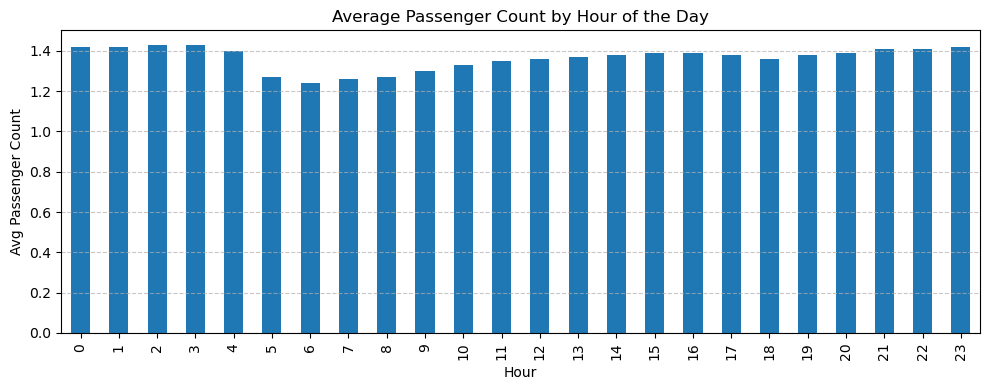

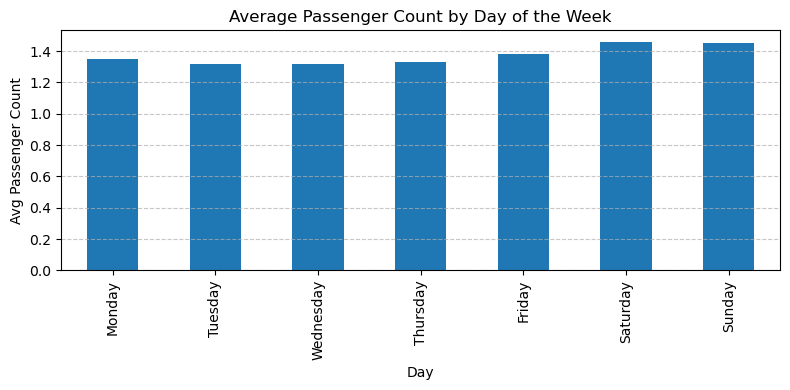

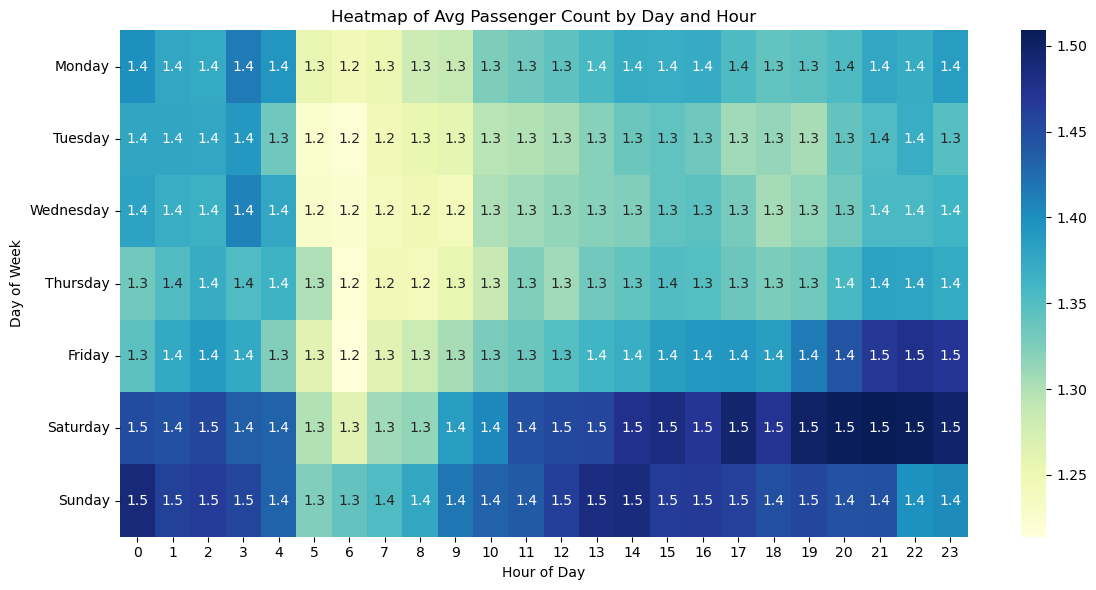

In [111]:
# See how passenger count varies across hours and days

df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

passenger_by_hour = df.groupby('hour')['passenger_count'].mean().round(2)

plt.figure(figsize=(10, 4))
passenger_by_hour.plot(kind='bar')
plt.title('Average Passenger Count by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Avg Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

passenger_by_day = df.groupby('day_of_week')['passenger_count'].mean().round(2)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_by_day = passenger_by_day.reindex(ordered_days)

plt.figure(figsize=(8, 4))
passenger_by_day.plot(kind='bar')
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Avg Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

pivot_table = df.pivot_table(
    values='passenger_count',
    index='day_of_week',
    columns='hour',
    aggfunc='mean'
).reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Heatmap of Avg Passenger Count by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones

pickup_passenger_counts = df.groupby('pickup_zone')['passenger_count'].mean().round(2).sort_values(ascending=False)
top_pickups = pickup_passenger_counts.head(10)

plt.figure(figsize=(10, 5))
top_pickups.plot(kind='bar')
plt.title('Top 10 Pickup Zones by Avg Passenger Count per Trip')
plt.xlabel('Pickup Zone')
plt.ylabel('Avg Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = df.groupby('pickup_zone')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.columns = ['zone_name', 'avg_passenger_count']

zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, on='zone_name', how='left')
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [127]:
# How often is each surcharge applied?

print("Extra surcharge frequency:")
print(df['extra'].value_counts().sort_index())

print("\nMTA Tax frequency:")
print(df['mta_tax'].value_counts().sort_index())

print("\nImprovement Surcharge frequency:")
print(df['improvement_surcharge'].value_counts().sort_index())

# 4. if 'congestion_surcharge' in df.columns:
    #print("\nCongestion Surcharge frequency:")
    #print(df['congestion_surcharge'].value_counts().sort_index())

Extra surcharge frequency:
extra
-5.00          1
-2.50          1
-1.00          1
 0.00     799744
 0.01          1
           ...  
 11.75      1371
 12.50         1
 12.75         2
 13.00         1
 14.25         3
Name: count, Length: 68, dtype: int64

MTA Tax frequency:
mta_tax
-0.50        105
 0.00      19018
 0.05         34
 0.50    1972019
 0.80         70
 3.00          1
 4.00          1
Name: count, dtype: int64

Improvement Surcharge frequency:
improvement_surcharge
-1.0        110
-0.3          2
 0.0        849
 0.3       1344
 1.0    1988943
Name: count, dtype: int64


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.


The intersection of location, time of day, day of week, and passenger behavior shapes a predictable pattern of demand. A well-optimized strategy to balance supply and pricing — aligned with these parameters — can enhance both customer satisfaction and driver profitability.

Time-Based Supply Allocation, Zone based resource planning, PAssenger behaviour and satisfaction with the trip counts.







**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Average fare per mile is higher during nighttime and weekends, likely due to lower traffic and higher surcharges.
Vendor differences are minor. Trip volume peaks between 8 AM – 10 AM and 5 PM – 8 PM on weekdays, indicating strong commuter traffic. 
Night trips (11 PM – 5 AM) contribute ~15% to revenue but often have fewer passengers per trip. 
Improvement Surcharge are almost always applied.
    

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months. 
Pickup zones near airports, hotels, and tourist areas see:
Higher passenger counts
More night/weekend activity
Longer average trip distances


In [ ]:
Airport zones - Pre-position larger vehicles near terminals during peak flight hours. Use real-time flight tracking to dynamically allocate drivers based on arrivals.
Encourage drivers to wait in holding zones at airports with app-based queue management to reduce idle time.

Tourist Zones - Increase supply from 10 AM to 3 PM and 8 PM to midnight on Fridays to Sundays. Promote scheduled pickups or concierge dispatching from hotels.
Partner with tour operators or event organizers to anticipate group bookings.

Residential zones - Position cabs near residential hubs between 6–9 AM for work/school commutes. Focus on return trips into residential areas between 5–8 PM.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Use heatmaps & predictive demand models to adjust fleet distribution dynamically.
Build zone-level driver incentives to balance supply in underserved high-potential areas.
Encourage scheduled ride bookings for known high-demand zones like airports and events.
Set up temporary micro-hubs or staging zones in areas with frequent surges to reduce response time.

In [ ]:
Insight: 
Demand spikes during commute hours and late nights on weekends; tips and fare-per-mile are also higher at these times. Execute peak pricing
Short trips have high fare-per-mile; long trips have lower rates but higher total revenue.
Airports, tourist zones, and hotel districts show high demand and tip percentages.
Tip-Driven Driver Bonus Optimization
To retain market share, staying close to competitor pricing is essential.
Encourage ride pooling to reduce operational overhead

